In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 50.8 MB/s eta 0:00:00


In [ ]:
#Importing the dataset
!curl -L "https://universe.roboflow.com/ds/PsYybkpkTp?key=SBpHtLea4T" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/labels/front_bumber-83-_jpg.rf.92c26cdf664ff0b8e472d87edcb40fd6.txt  
 extracting: train/labels/front_bumber-9-_jpg.rf.1237bf978f2a2d27bb9b41b2521d3192.txt  
  inflating: train/labels/front_bumber-9-_jpg.rf.2bb71236dd90b2cfe14987993e8259a5.txt  
 extracting: train/labels/front_bumber-9-_jpg.rf.49afa11e5886be6f8068627550e5a1a1.txt  
 extracting: train/labels/front_bumber-9-_jpg.rf.68343ca6f3f668029469ac4bee5356f2.txt  
 extracting: train/labels/front_bumber-90-_jpg.rf.9c1f5a30421db26e01bc829f4793106f.txt  
 extracting: train/labels/front_bumber-90-_jpg.rf.a5a2458161fbde7159c2be7e384f1f6f.txt  
 extracting: train/labels/front_bumber-90-_jpg.rf.a6983eae5c68417e884b0ae312889059.txt  
 extracting: train/labels/front_bumber-90-_jpg.rf.b60245ad46e3c68c338321eb3bb7258e.txt  
  inflating: train/labels/front_bumber-93-_jpg.rf.529aeb3183a3d3c80baf4daea29cfab7.txt  
  inflating: train/labels/front_bumber-93-_jpg.rf.c1b550b0a438a

In [ ]:
#Splitting the dataset into training and validation
import os
import random
import shutil

# Defining paths
train_image_dir = '/content/train/images'
train_label_dir = '/content/train/labels'
valid_image_dir = '/content/valid/images'
valid_label_dir = '/content/valid/labels'


os.makedirs(valid_image_dir, exist_ok=True)
os.makedirs(valid_label_dir, exist_ok=True)

# Geting all image files in the train directory
all_images = [f for f in os.listdir(train_image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
total_images = len(all_images)
valid_count = int(0.2 * total_images)

# Randomly select images for validation
valid_images = random.sample(all_images, valid_count)

# Move selected images and corresponding labels to valid folder
for image_name in valid_images:
    # Paths for image and label files
    image_path = os.path.join(train_image_dir, image_name)
    label_name = image_name.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
    label_path = os.path.join(train_label_dir, label_name)

    # Destination paths in valid folder
    valid_image_path = os.path.join(valid_image_dir, image_name)
    valid_label_path = os.path.join(valid_label_dir, label_name)

    # Move the files
    shutil.move(image_path, valid_image_path)
    shutil.move(label_path, valid_label_path)

print(f"Moved {valid_count} images and labels to the validation set.")


Moved 1565 images and labels to the validation set.


In [ ]:
!ls /content/train

images	labels


In [ ]:
ROOT_DIR =  '/content/drive/MyDrive/DamageDetection'

!ls {ROOT_DIR}

DamageDetection_1		 data_old.yaml	runs   valid	   yolov8n.pt
DamagedetectionYolov8_1_2.ipynb  data_v4.yaml	train  yolo11n.pt


In [ ]:
!mv yolov8n.pt '{ROOT_DIR}'

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
import os
import glob

# Define paths to the labels and images directories within Google Drive
label_path = os.path.join(ROOT_DIR, 'train', 'labels')
image_path = os.path.join(ROOT_DIR, 'train', 'images')

# Finding empty label files
empty_label_files = [file for file in glob.glob(os.path.join(label_path, "*.txt")) if os.path.getsize(file) == 0]

print("Empty label files and their corresponding images:")

# # Process each empty label file
# for label_file in empty_label_files:
#     # Determine corresponding image path by replacing .txt with .jpg
#     image_file = os.path.join(image_path, os.path.basename(label_file).replace(".txt", ".jpg"))

#     # Check if the corresponding image exists and delete both files if so
#     if os.path.exists(image_file):
#         os.remove(image_file)
#         print(f"Removed image: {image_file}")

#     # Remove the empty label file
#     os.remove(label_file)
#     print(f"Removed label: {label_file}")

print(f"\nRemoved {len(empty_label_files)} empty label files and their corresponding images.")

Empty label files and their corresponding images:

Removed 0 empty label files and their corresponding images.


In [ ]:
import wandb
wandb.login()


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import os

save_dir = '/content/drive/MyDrive/DamageDetection/runs'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


In [ ]:
from ultralytics import YOLO
from google.colab import drive
import os
from datetime import datetime

# Mount Google Drive
drive.mount('/content/drive')

# Define the main directory on Google Drive
ROOT_DIR = '/content/drive/MyDrive/DamageDetection'
save_dir = f"{ROOT_DIR}/runs"  # Base directory for all runs

# Create a unique experiment name with a timestamp
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
experiment_name = f"train_{timestamp}"
full_save_dir = os.path.join(save_dir, experiment_name)  # Full path for this specific run

# Ensure the save directory exists
os.makedirs(full_save_dir, exist_ok=True)

model = YOLO('yolov8n.pt')

results = model.train(
                      data=f'{ROOT_DIR}/data.yaml',
                      epochs=100,
                      imgsz=640,
                      augment=True,
                      lr0=0.0005,
                      patience=10,
                      weight_decay=0.0005,
                      workers=8,
                      batch=16,
                      project=full_save_dir,
                      name=experiment_name,
                      save_period=1)

# !mv {save_dir} {ROOT_DIR}/  # Moves entire train folder to Google Drive
# print(f"Training results moved to {ROOT_DIR}")

# import locale
# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"
# locale.getpreferredencoding = getpreferredencoding
# # !scp -r /content/drive/MyDrive/DamageDetection/ "{ROOT_DIR}/"

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DamageDetection/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/DamageDetection/runs/train_20241102-132603, name=train_20241102-132603, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.0MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DamageDetection/train/labels... 6260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6260/6260 [34:33<00:00,  3.02it/s]


train: New cache created: /content/drive/MyDrive/DamageDetection/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 9385. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/DamageDetection/valid/labels... 1565 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1565/1565 [08:28<00:00,  3.08it/s]


val: New cache created: /content/drive/MyDrive/DamageDetection/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 2339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /content/drive/MyDrive/DamageDetection/runs/train_20241102-132603/train_20241102-132603/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DamageDetection/runs/train_20241102-132603/train_20241102-132603
Starting training for 100 epoc

      1/100      2.32G      1.557      3.703      1.841          6        640: 100%|██████████| 392/392 [02:49<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:25<00:00,  1.91it/s]


                   all       1565       2339      0.354      0.203      0.145      0.066

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.24G      1.539      3.002      1.799          4        640: 100%|██████████| 392/392 [02:45<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.21it/s]


                   all       1565       2339      0.396      0.276      0.192     0.0864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.28G      1.539      2.723      1.774         15        640: 100%|██████████| 392/392 [02:45<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.19it/s]


                   all       1565       2339      0.411      0.291      0.263      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.25G      1.534      2.531      1.758         14        640: 100%|██████████| 392/392 [02:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.05it/s]


                   all       1565       2339      0.459      0.297      0.263       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.25G      1.508      2.359      1.723         10        640: 100%|██████████| 392/392 [02:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.01it/s]


                   all       1565       2339      0.511      0.343      0.333      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.25G      1.499      2.252      1.714          6        640: 100%|██████████| 392/392 [02:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.07it/s]


                   all       1565       2339      0.497      0.401      0.394      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.27G      1.475      2.149      1.699         12        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]


                   all       1565       2339      0.396      0.387      0.375      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.25G      1.458      2.066      1.673          8        640: 100%|██████████| 392/392 [02:43<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]


                   all       1565       2339       0.47      0.445       0.43      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.25G      1.437      2.021      1.665         10        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]


                   all       1565       2339      0.481      0.463      0.428      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.25G      1.438      1.967      1.657         13        640: 100%|██████████| 392/392 [02:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.23it/s]


                   all       1565       2339      0.559       0.47      0.469      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.27G      1.421      1.928      1.648         17        640: 100%|██████████| 392/392 [02:41<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]


                   all       1565       2339      0.533      0.466      0.472      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.26G      1.414       1.89      1.628         11        640: 100%|██████████| 392/392 [02:43<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]


                   all       1565       2339      0.507      0.463      0.486      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.26G      1.399      1.823      1.625         12        640: 100%|██████████| 392/392 [02:42<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.18it/s]


                   all       1565       2339      0.604      0.479       0.51       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.25G      1.383      1.786      1.613         19        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.20it/s]


                   all       1565       2339      0.538      0.522      0.515      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.25G      1.361      1.763      1.597         14        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.97it/s]


                   all       1565       2339      0.621      0.518      0.555      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.25G      1.359      1.711       1.59          8        640: 100%|██████████| 392/392 [02:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.08it/s]


                   all       1565       2339       0.58       0.52      0.558      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.26G      1.344      1.674      1.581         12        640: 100%|██████████| 392/392 [02:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]

                   all       1565       2339      0.577      0.536      0.557      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.25G      1.324      1.657      1.571         12        640: 100%|██████████| 392/392 [02:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.04it/s]

                   all       1565       2339      0.641      0.509      0.573      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.24G      1.317      1.619      1.559         22        640: 100%|██████████| 392/392 [02:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]


                   all       1565       2339      0.626       0.56       0.59      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.24G      1.306      1.609       1.55         14        640: 100%|██████████| 392/392 [02:40<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]

                   all       1565       2339      0.642      0.567      0.596      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.25G      1.299      1.584      1.541         11        640: 100%|██████████| 392/392 [02:41<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.22it/s]


                   all       1565       2339      0.575      0.571       0.59      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.26G       1.29      1.552      1.532         19        640: 100%|██████████| 392/392 [02:41<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.22it/s]

                   all       1565       2339      0.695      0.505      0.577       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.25G      1.278      1.559      1.535         11        640: 100%|██████████| 392/392 [02:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]


                   all       1565       2339      0.663      0.565      0.611      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.25G      1.279      1.511      1.527         13        640: 100%|██████████| 392/392 [02:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.30it/s]


                   all       1565       2339      0.645      0.556      0.623      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.25G      1.252      1.462      1.504          8        640: 100%|██████████| 392/392 [02:35<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.04it/s]

                   all       1565       2339      0.621      0.583       0.62      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.25G      1.252      1.473       1.51          7        640: 100%|██████████| 392/392 [02:36<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]


                   all       1565       2339      0.614      0.609      0.632      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.25G      1.245      1.461        1.5          8        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.32it/s]


                   all       1565       2339      0.707      0.552      0.631      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.25G      1.227      1.426      1.493          8        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:28<00:00,  1.71it/s]


                   all       1565       2339      0.634      0.606      0.639      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.26G      1.223      1.412      1.479         12        640: 100%|██████████| 392/392 [02:36<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.10it/s]


                   all       1565       2339      0.675      0.616      0.649      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.26G       1.21      1.374      1.471         14        640: 100%|██████████| 392/392 [02:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.07it/s]


                   all       1565       2339      0.705      0.599      0.655      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.25G      1.197       1.37      1.463         13        640: 100%|██████████| 392/392 [02:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.07it/s]


                   all       1565       2339      0.662      0.608      0.655      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.25G      1.196      1.364      1.458         14        640: 100%|██████████| 392/392 [02:33<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:27<00:00,  1.78it/s]

                   all       1565       2339      0.696      0.605      0.665      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.25G      1.182      1.341      1.454         14        640: 100%|██████████| 392/392 [02:34<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.07it/s]

                   all       1565       2339      0.648      0.664       0.67      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.25G      1.181       1.35      1.453         15        640: 100%|██████████| 392/392 [02:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]

                   all       1565       2339      0.664      0.651      0.676       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.25G       1.17      1.314      1.445         10        640: 100%|██████████| 392/392 [02:41<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]

                   all       1565       2339      0.656      0.657      0.687      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.25G      1.151      1.285      1.433         10        640: 100%|██████████| 392/392 [02:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]

                   all       1565       2339      0.739      0.619      0.692      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.25G      1.153      1.286      1.429         12        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]

                   all       1565       2339      0.705      0.638      0.688      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.25G      1.132      1.268      1.418         14        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]

                   all       1565       2339      0.678      0.659      0.688      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.26G      1.142      1.253      1.424         18        640: 100%|██████████| 392/392 [02:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]

                   all       1565       2339      0.765      0.609      0.678      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.26G       1.13       1.25      1.415          9        640: 100%|██████████| 392/392 [02:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.11it/s]

                   all       1565       2339      0.704      0.667      0.704      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.25G      1.108      1.218      1.395         16        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.31it/s]

                   all       1565       2339      0.717      0.646      0.701      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.25G      1.118      1.224      1.405         14        640: 100%|██████████| 392/392 [02:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:20<00:00,  2.34it/s]


                   all       1565       2339      0.716      0.648      0.707      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.26G      1.115       1.21      1.398         17        640: 100%|██████████| 392/392 [02:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.21it/s]

                   all       1565       2339      0.693      0.673      0.703      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.25G      1.096      1.177       1.38         16        640: 100%|██████████| 392/392 [02:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:20<00:00,  2.39it/s]

                   all       1565       2339      0.702      0.648      0.704      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.26G      1.096      1.185      1.391          9        640: 100%|██████████| 392/392 [02:36<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.04it/s]

                   all       1565       2339      0.771      0.626      0.705      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.25G      1.084      1.162      1.376         11        640: 100%|██████████| 392/392 [02:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.30it/s]

                   all       1565       2339      0.742      0.644       0.71       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.24G      1.081       1.16      1.371         11        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.32it/s]

                   all       1565       2339      0.701      0.663      0.704      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.25G      1.064      1.137      1.361          9        640: 100%|██████████| 392/392 [02:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.33it/s]

                   all       1565       2339      0.748       0.65      0.711      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.25G      1.066      1.126      1.357         12        640: 100%|██████████| 392/392 [02:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]

                   all       1565       2339      0.742      0.637      0.711      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.26G      1.062      1.123      1.357         11        640: 100%|██████████| 392/392 [02:40<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]

                   all       1565       2339      0.752      0.645      0.717      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.24G      1.058      1.123      1.359          9        640: 100%|██████████| 392/392 [02:41<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]

                   all       1565       2339      0.794      0.636      0.725      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.25G      1.041      1.096      1.344         14        640: 100%|██████████| 392/392 [02:41<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.12it/s]

                   all       1565       2339      0.811      0.619       0.72      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.24G      1.031      1.094       1.34          7        640: 100%|██████████| 392/392 [02:34<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.04it/s]

                   all       1565       2339      0.695      0.685      0.722      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.26G       1.04      1.072       1.34          8        640: 100%|██████████| 392/392 [02:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  1.98it/s]


                   all       1565       2339      0.726      0.663      0.729      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.24G      1.029      1.072      1.332          9        640: 100%|██████████| 392/392 [02:44<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.19it/s]

                   all       1565       2339      0.755      0.671      0.731      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.26G      1.013      1.056      1.321         12        640: 100%|██████████| 392/392 [02:44<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]

                   all       1565       2339      0.732      0.655      0.727      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.24G      1.015      1.062      1.329          8        640: 100%|██████████| 392/392 [02:42<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.24it/s]

                   all       1565       2339      0.773      0.664      0.733      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.25G      1.011      1.051      1.321         12        640: 100%|██████████| 392/392 [02:43<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]

                   all       1565       2339      0.716      0.693      0.733      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.26G      1.003       1.04      1.317         12        640: 100%|██████████| 392/392 [02:43<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]

                   all       1565       2339      0.728      0.672      0.729      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.25G     0.9952      1.028      1.306         13        640: 100%|██████████| 392/392 [02:42<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.23it/s]

                   all       1565       2339      0.796      0.665      0.745      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.24G     0.9906      1.014      1.307          9        640: 100%|██████████| 392/392 [02:43<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.23it/s]

                   all       1565       2339      0.771      0.671      0.741      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.25G     0.9806      1.009      1.297         16        640: 100%|██████████| 392/392 [02:44<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:20<00:00,  2.34it/s]

                   all       1565       2339       0.78      0.663      0.746      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.26G     0.9843     0.9885      1.297         13        640: 100%|██████████| 392/392 [02:45<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.03it/s]


                   all       1565       2339      0.766      0.653      0.736      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.26G     0.9607     0.9871      1.281          9        640: 100%|██████████| 392/392 [02:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:26<00:00,  1.84it/s]


                   all       1565       2339      0.799      0.666      0.745       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.24G     0.9545     0.9694       1.28         11        640: 100%|██████████| 392/392 [02:39<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.23it/s]


                   all       1565       2339      0.786      0.673      0.747      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.26G     0.9733      0.993      1.296         13        640: 100%|██████████| 392/392 [02:41<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]

                   all       1565       2339      0.822      0.665      0.755      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.24G     0.9547      0.968      1.274          8        640: 100%|██████████| 392/392 [02:42<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]

                   all       1565       2339      0.772      0.685      0.747       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.26G      0.957     0.9695      1.281          8        640: 100%|██████████| 392/392 [02:41<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]

                   all       1565       2339      0.777      0.689      0.755      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.26G     0.9588     0.9642      1.281         10        640: 100%|██████████| 392/392 [02:42<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.23it/s]

                   all       1565       2339      0.813      0.658       0.75      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.25G     0.9389     0.9401      1.272         11        640: 100%|██████████| 392/392 [02:39<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.32it/s]

                   all       1565       2339      0.768       0.69      0.749      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.24G     0.9392     0.9466      1.269         10        640: 100%|██████████| 392/392 [02:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.33it/s]

                   all       1565       2339      0.745      0.706      0.751      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.24G     0.9414     0.9377      1.262         14        640: 100%|██████████| 392/392 [02:35<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.31it/s]

                   all       1565       2339      0.774      0.705      0.756      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.26G     0.9254     0.9242      1.261          6        640: 100%|██████████| 392/392 [02:35<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.31it/s]

                   all       1565       2339       0.79      0.693      0.756      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.25G      0.931     0.9342       1.26         10        640: 100%|██████████| 392/392 [02:36<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:20<00:00,  2.34it/s]

                   all       1565       2339      0.797      0.686      0.755      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.24G     0.9193     0.9159      1.251         13        640: 100%|██████████| 392/392 [02:36<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.31it/s]

                   all       1565       2339      0.789      0.705      0.758       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.26G     0.9195     0.9078      1.251         16        640: 100%|██████████| 392/392 [02:36<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.25it/s]

                   all       1565       2339      0.787        0.7       0.76      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.24G     0.9151     0.9096      1.249         11        640: 100%|██████████| 392/392 [02:36<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]

                   all       1565       2339      0.794      0.705      0.762      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.26G     0.9124     0.9042      1.253         10        640: 100%|██████████| 392/392 [02:34<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.18it/s]

                   all       1565       2339      0.802      0.699      0.765      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.24G     0.9109     0.9024      1.249         19        640: 100%|██████████| 392/392 [02:34<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.04it/s]

                   all       1565       2339      0.788      0.697      0.759       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.24G      0.903     0.8916      1.244         11        640: 100%|██████████| 392/392 [02:33<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.06it/s]

                   all       1565       2339      0.791      0.691      0.761      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.25G      0.901     0.8815      1.238         17        640: 100%|██████████| 392/392 [02:33<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.09it/s]

                   all       1565       2339      0.777      0.704      0.757      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.26G     0.8945      0.875      1.237         21        640: 100%|██████████| 392/392 [02:34<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.06it/s]


                   all       1565       2339      0.744      0.735      0.759      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.25G     0.8841     0.8641      1.231          9        640: 100%|██████████| 392/392 [02:33<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.09it/s]

                   all       1565       2339      0.771      0.716      0.761      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.25G     0.8844     0.8553      1.232         14        640: 100%|██████████| 392/392 [02:35<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.18it/s]

                   all       1565       2339      0.791      0.691      0.757      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.24G     0.8788     0.8548      1.227         10        640: 100%|██████████| 392/392 [02:36<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.27it/s]

                   all       1565       2339      0.767      0.728      0.762      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.25G     0.8703     0.8524      1.224         11        640: 100%|██████████| 392/392 [02:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]

                   all       1565       2339      0.757      0.728      0.763      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.26G     0.8743     0.8437      1.223         17        640: 100%|██████████| 392/392 [02:38<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:20<00:00,  2.36it/s]

                   all       1565       2339      0.787      0.703       0.76      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.24G     0.8675     0.8417      1.221         10        640: 100%|██████████| 392/392 [02:36<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:20<00:00,  2.38it/s]

                   all       1565       2339      0.782      0.719      0.761       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.25G     0.8745     0.8387       1.22         12        640: 100%|██████████| 392/392 [02:36<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.26it/s]

                   all       1565       2339      0.772      0.719      0.762      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.26G     0.8654     0.8287      1.213         23        640: 100%|██████████| 392/392 [02:35<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:22<00:00,  2.16it/s]

                   all       1565       2339      0.774       0.72      0.764      0.551


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.24G     0.8212     0.6554      1.243          7        640: 100%|██████████| 392/392 [02:32<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.28it/s]


                   all       1565       2339      0.762      0.717      0.762      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.24G     0.7941     0.6233      1.214          4        640: 100%|██████████| 392/392 [02:32<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.29it/s]

                   all       1565       2339       0.76      0.729      0.761      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.24G      0.787     0.6145      1.206          4        640: 100%|██████████| 392/392 [02:42<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:26<00:00,  1.86it/s]

                   all       1565       2339      0.769      0.727      0.761      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.24G     0.7681     0.5961      1.198          7        640: 100%|██████████| 392/392 [02:44<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.01it/s]

                   all       1565       2339      0.788      0.711      0.764      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.24G     0.7702     0.5993      1.197          5        640: 100%|██████████| 392/392 [02:43<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.09it/s]

                   all       1565       2339      0.783      0.715      0.765      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.22G     0.7612     0.5832      1.188          7        640: 100%|██████████| 392/392 [02:37<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:24<00:00,  2.00it/s]

                   all       1565       2339      0.779      0.719      0.767      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.24G     0.7615     0.5893      1.193          4        640: 100%|██████████| 392/392 [02:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.23it/s]

                   all       1565       2339      0.788      0.713      0.768      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.24G     0.7476     0.5751      1.183          7        640: 100%|██████████| 392/392 [02:34<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.13it/s]

                   all       1565       2339      0.777      0.722      0.767      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.24G      0.749     0.5725      1.173          7        640: 100%|██████████| 392/392 [02:30<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:21<00:00,  2.31it/s]

                   all       1565       2339      0.782      0.721      0.767      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.24G     0.7444     0.5632      1.171          5        640: 100%|██████████| 392/392 [02:32<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:23<00:00,  2.11it/s]

                   all       1565       2339      0.785      0.718      0.765      0.564



100 epochs completed in 5.097 hours.
Optimizer stripped from /content/drive/MyDrive/DamageDetection/runs/train_20241102-132603/train_20241102-132603/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/DamageDetection/runs/train_20241102-132603/train_20241102-132603/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/DamageDetection/runs/train_20241102-132603/train_20241102-132603/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:26<00:00,  1.87it/s]


                   all       1565       2339      0.831      0.705      0.789      0.592
   Runningboard-Damage         56         70       0.84        0.7      0.786      0.525
damage-front-windscreen         56         56      0.764      0.804      0.798       0.59
          damaged-door        269        346      0.867      0.777      0.886      0.669
        damaged-fender        206        206      0.808      0.631      0.764      0.522
  damaged-front-bumper        410        423      0.903      0.771      0.862      0.664
    damaged-head-light        136        142      0.798      0.662       0.71      0.493
          damaged-hood        240        240      0.876        0.8      0.871      0.616
   damaged-rear-bumper        217        220      0.885      0.736      0.848      0.659
   damaged-rear-window        136        136      0.913       0.86      0.938      0.812
          damaged-roof         88        100      0.899      0.804      0.866      0.714
   damaged-side-wind

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
# !scp -r /content/drive/MyDrive/DamageDetection/ "{ROOT_DIR}/"

In [ ]:
!ls /content/drive/MyDrive/DamageDetection/runs/train/weights/


image 1/1 /content/detectionTest2.jpg: 640x640 1 damaged-door, 1 damaged-fender, 1 damaged-front-bumper, 1 damaged-head-light, 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


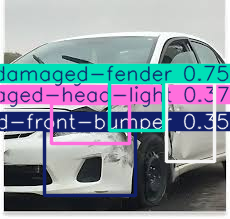

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/best.pt")  # path to model

# Run batched inference on a list of images
results = model("/content/detectionTest2.jpg")  # Path to image

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk